# Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products

# **Data Defination**

    
1) **User_ID** - User ID 
    
2) **Product_ID** - Product ID
    
3) **Gender** - Sex of User
    
4) **Age** - Age in bins
    
5) **Occupation** - Occupation (Masked)
    
6) **City_Category** -	Category of the City (A,B,C)
    
7) **Stay_In_Current_City_Years** - Number of years stay in current city
    
8) **Marital_Status** - Marital Status
    
9) **Product_Category_1** - Product Category (Masked)
    
10) **Product_Category_2** - Product may belongs to other category also (Masked)
    
11) **Product_Category_3** - Product may belongs to other category also (Masked)
    
12) **Purchase** - Purchase Amount (Target Variable)

Approach

1. Get unique values for each column
2. Univariate Analysis
        2.1 Purchase Dist(plots)
        2.1 Gender
        2.2 City
        2.3 Age
        2.4 Occupation
        2.5 Marital_Status
        2.6 Product_Category_1
        2.7 Product_Category_2
        2.8 Product_Category_3 

3. Bivariate Analysis(Pivot tables, cross tab)
       3.1 Gender and Purchase
       3.2 Age and Purchase
       3.3 City and Purchase
       3.4 Occupation and Purchase
       3.5 Marital_Status and Purchase
       3.6 Product_Category and Purchase - Most and lease expensive 
       
4. Baseline approach could be as simple as avergae price or average price per Product category.
5. Data Preprocessing - Basically preparing the data for training ML models
6. Baseline ML model
7. Featrure Importances.


# IMPORT MODULE:

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# LOADING THE DATASET:

In [12]:
df = pd.read_csv(r'E:\coaching\Data Science\Machine Learning\datasets\Black Friday\train.csv')

In [13]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [14]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [16]:
# Unique values for each column
df.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

In [17]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

<b>There are null values in Product_category_2, Product_Category_3

In [18]:
#If any, the drop duplicates
df.drop_duplicates(inplace = True)

In [19]:
df.shape

(550068, 12)

<b>Hence there were no duplicates

# EXPLORATORY DATA ANALYSIS:

In [20]:
df.value_counts('Age') 

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
dtype: int64

In [21]:
df.value_counts('Stay_In_Current_City_Years') 

Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
dtype: int64

<b>There are some special characters, like (+) in the columns 'Age' and 'stay in Current City_Years, which need to be removed, before machine learning algorithms can be run later.

In [22]:
df['Age']=(df['Age'].str.strip('+'))

In [23]:
df['Stay_In_Current_City_Years']=(df['Stay_In_Current_City_Years'].str.strip('+').astype('float'))


## UNIVARIATE ANALYSIS

<AxesSubplot:xlabel='Purchase', ylabel='Density'>

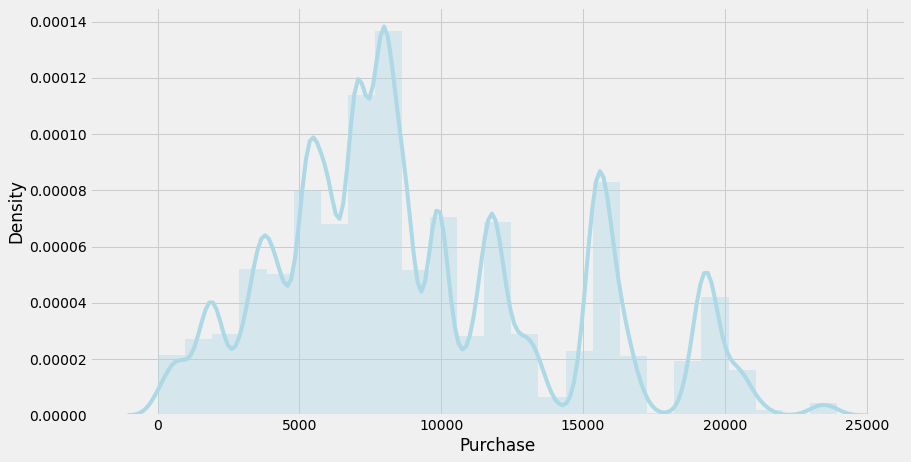

In [24]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13, 7))
sns.distplot(df['Purchase'], bins=25 , color ='lightblue')

<b>Purchase is moderately left skewed

<AxesSubplot:xlabel='Gender', ylabel='count'>

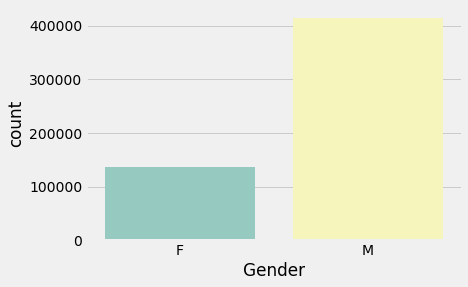

In [25]:
sns.countplot(df['Gender'], palette ='Set3')

<AxesSubplot:xlabel='Age', ylabel='count'>

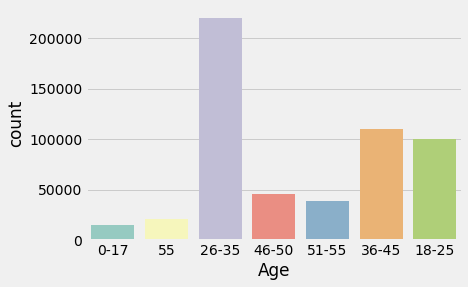

In [26]:
sns.countplot(df['Age'] , palette ='Set3')

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

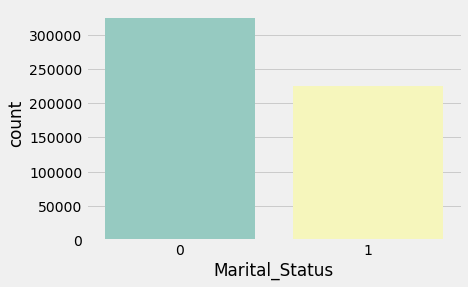

In [27]:
sns.countplot(df['Marital_Status'],palette ='Set3')

<AxesSubplot:xlabel='Occupation', ylabel='count'>

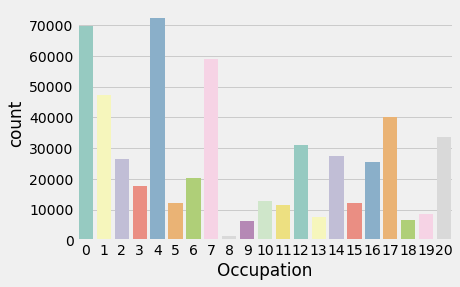

In [28]:
sns.countplot(df['Occupation'],palette ='Set3')

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

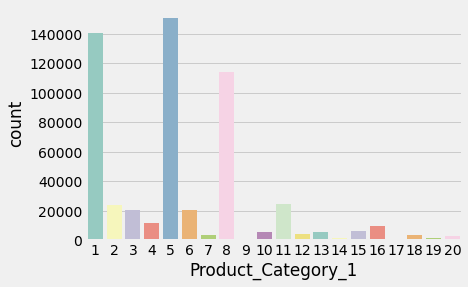

In [29]:
sns.countplot(df['Product_Category_1'],palette ='Set3')

<AxesSubplot:xlabel='Product_Category_2', ylabel='count'>

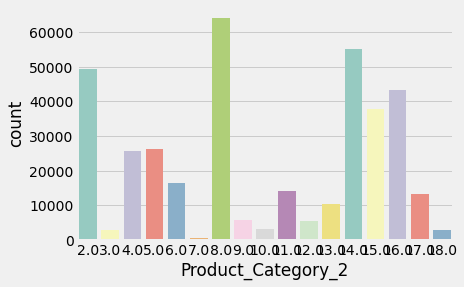

In [30]:
sns.countplot(df['Product_Category_2'],palette ='Set3')

<AxesSubplot:xlabel='Product_Category_3', ylabel='count'>

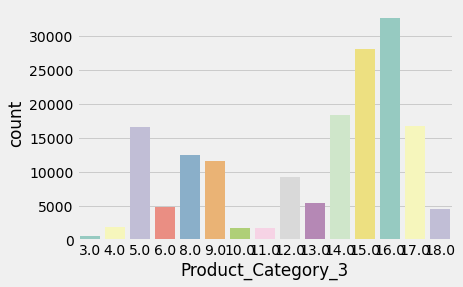

In [31]:
sns.countplot(df['Product_Category_3'],palette ='Set3')

<AxesSubplot:xlabel='City_Category', ylabel='count'>

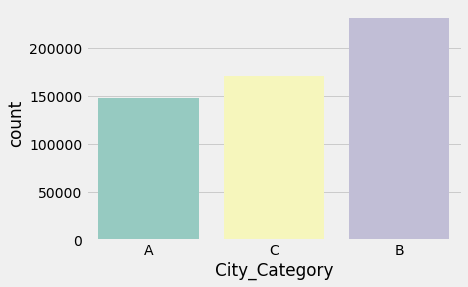

In [32]:
sns.countplot(df['City_Category'],palette ='Set3')

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

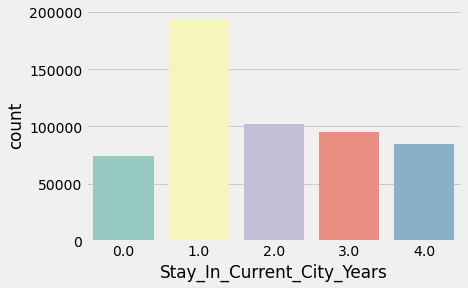

In [33]:
sns.countplot(df['Stay_In_Current_City_Years'],palette ='Set3')

<b>People currently living in City 1 is much higher

## BIVARIATE ANALYSIS

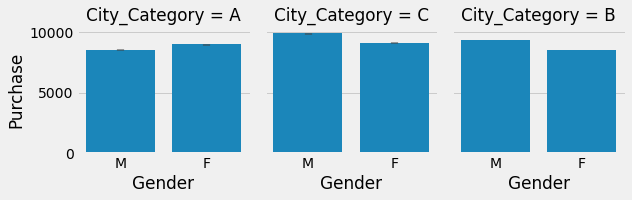

In [34]:
g = sns.FacetGrid(df,col="City_Category")
g.map(sns.barplot, "Gender", "Purchase");

<b>1.Clearly people from City_Category C are showing higher purchase capacity as compared to the other two     cities on average.

2.For City_categories B and C, Males tend to dominate the purchasing, whereas it is the opposite for City Category_A, where Females tend to puchase more than men. It is a useful insight, and it be useful to oserve which age group of females does higher purchasing.

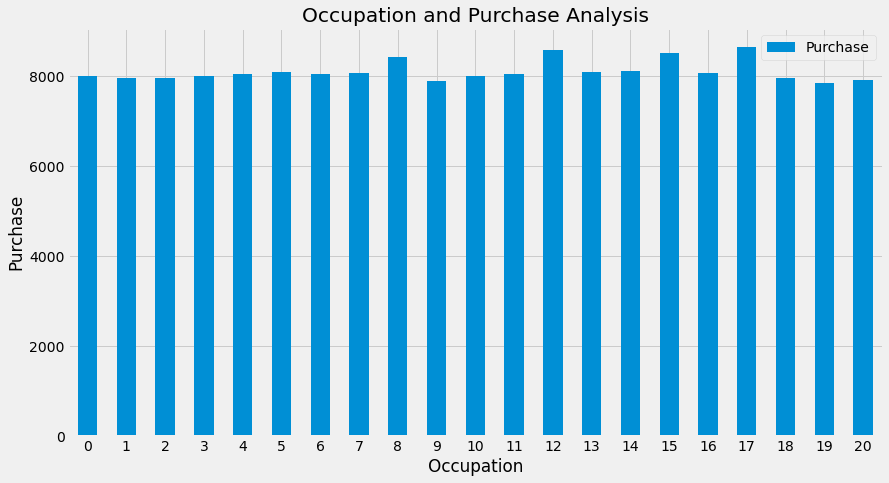

In [35]:
occupation_plot = df.pivot_table(index='Occupation', values='Purchase', aggfunc=np.median)
occupation_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Occupation')
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

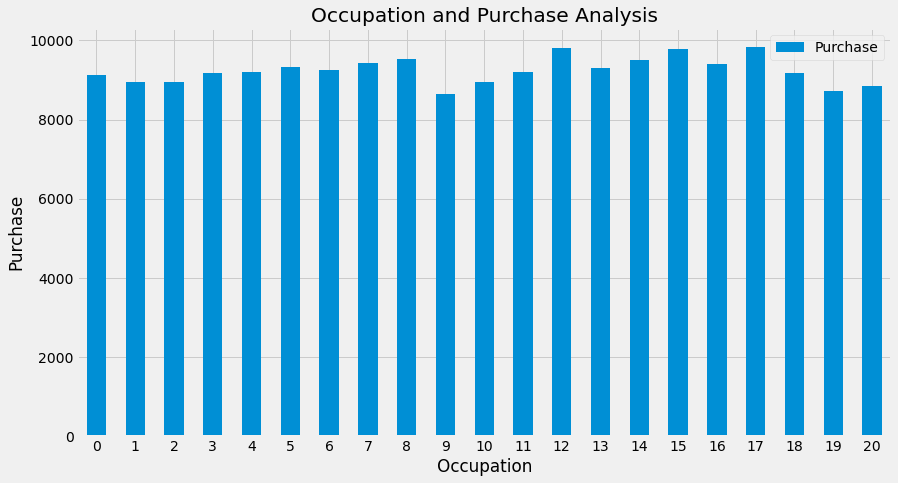

In [36]:
occupation_plot = df.pivot_table(index='Occupation', values='Purchase', aggfunc=np.mean)
occupation_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Occupation')
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

<b>It is difficult to conclude anything from the above visulaisation

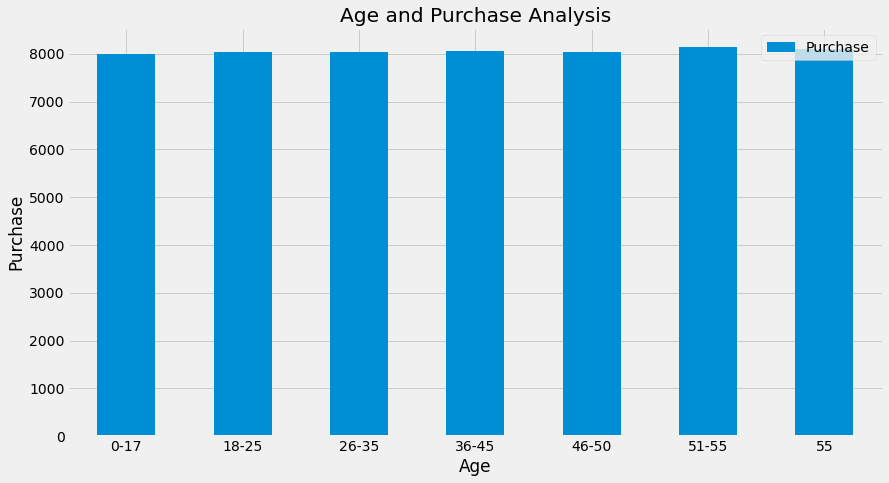

In [37]:
age_plot = df.pivot_table(index='Age', values='Purchase', aggfunc=np.median)
age_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Age')
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

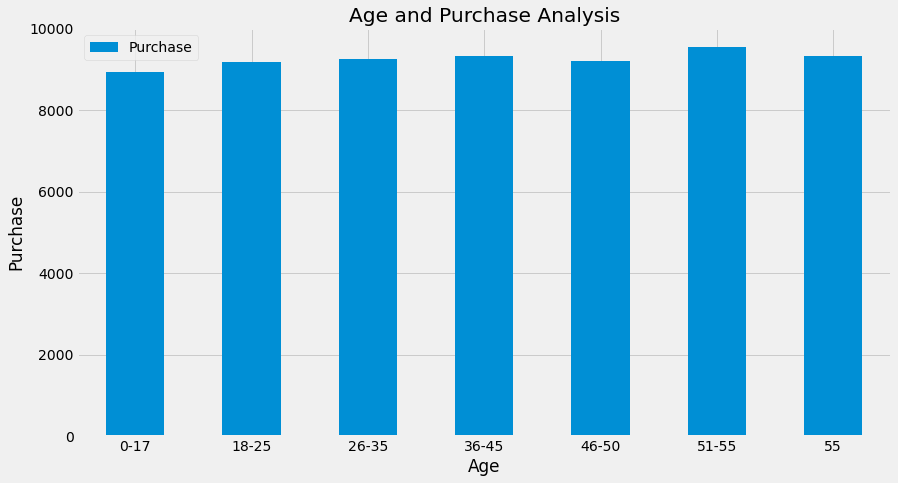

In [38]:
age_plot = df.pivot_table(index='Age', values='Purchase', aggfunc=np.mean)
age_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Age')
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

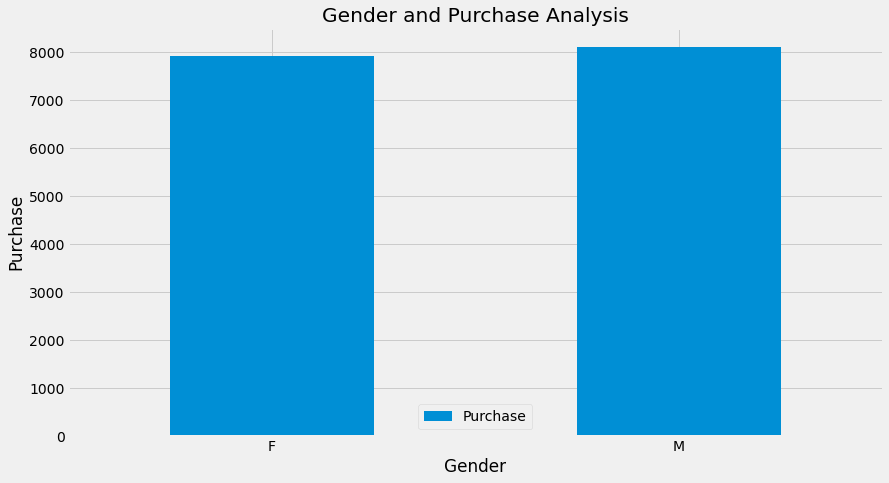

In [39]:
gender_plot = df.pivot_table(index='Gender', values='Purchase', aggfunc=np.median)
gender_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Gender')
plt.ylabel("Purchase")
plt.title("Gender and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

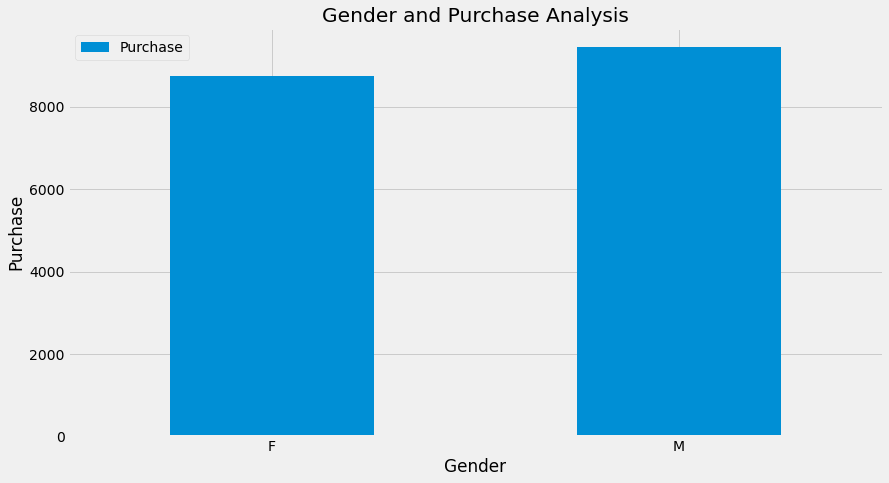

In [40]:
gender_plot = df.pivot_table(index='Gender', values='Purchase', aggfunc=np.mean)
gender_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Gender')
plt.ylabel("Purchase")
plt.title("Gender and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

<b>It is difficult to conclude anything from the above visulaisation, but it might be useful to analyse if the trend shows something different across the different cities,gender and age together.

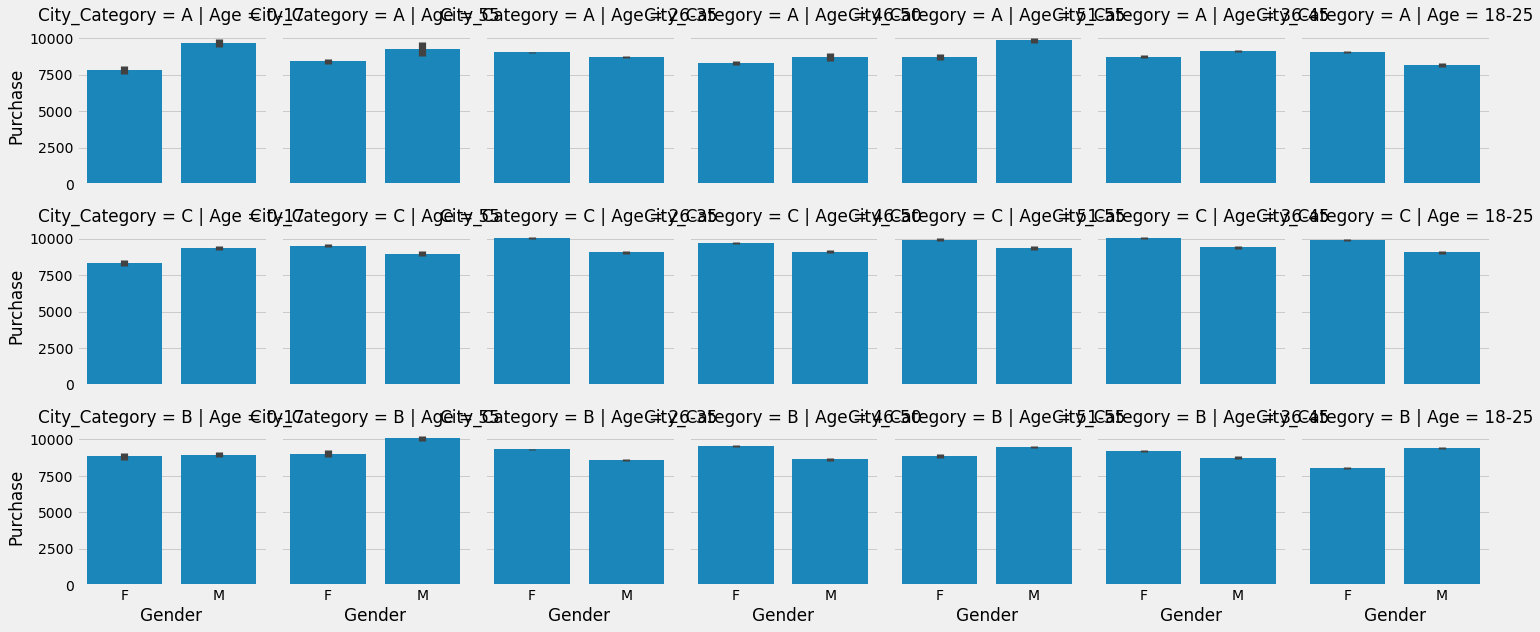

In [41]:
g = sns.FacetGrid(df,col="Age",row="City_Category")
g.map(sns.barplot, "Gender", "Purchase");

<b>So, we focus on the first row of the visuaisation, i.e. City_Category_A and then on the bar for females.

There are two age groups that can be identified with higher purchase, 26-35 and 18-25. Therefore, apart from the male population of all the three city categories, females of City Category A in the above two identifies age groups can be identified as potential buyers for next time around.

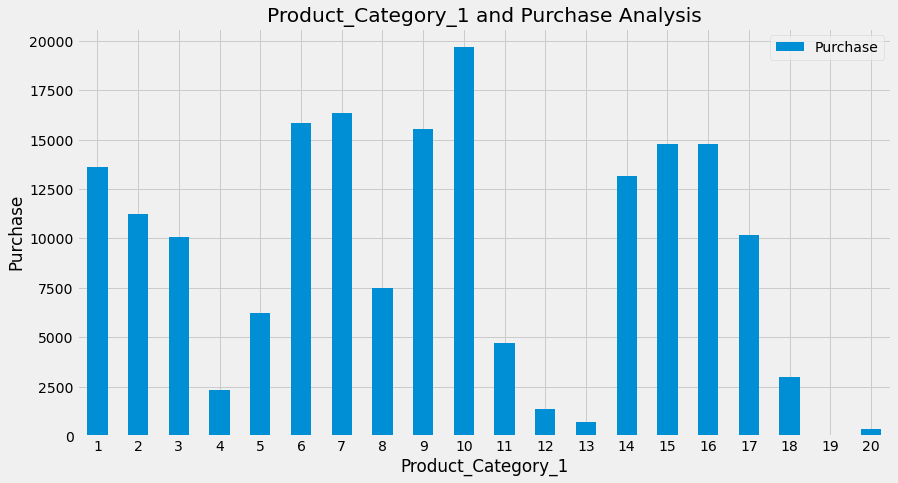

In [42]:
product_plot=df.pivot_table(index=['Product_Category_1'], values='Purchase', aggfunc=np.mean)
product_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Product_Category_1')
plt.ylabel("Purchase")
plt.title("Product_Category_1 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

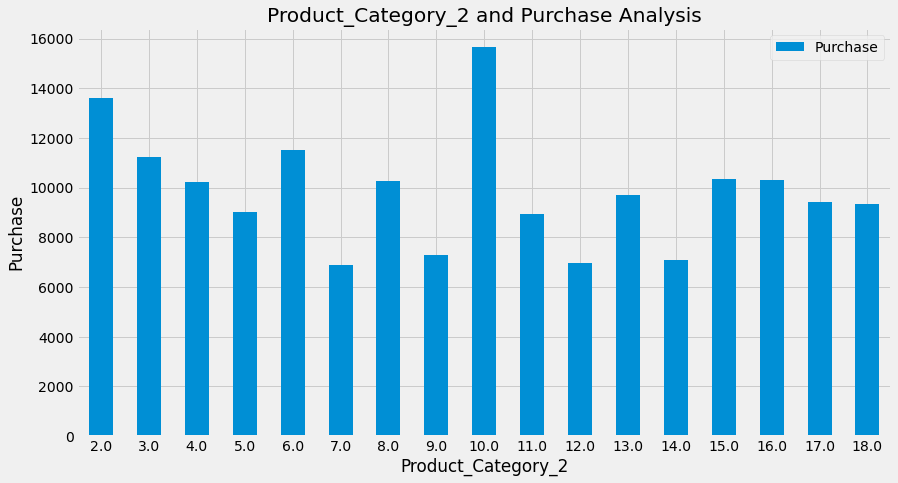

In [43]:
product_plot=df.pivot_table(index=['Product_Category_2'], values='Purchase', aggfunc=np.mean)
product_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Product_Category_2')
plt.ylabel("Purchase")
plt.title("Product_Category_2 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

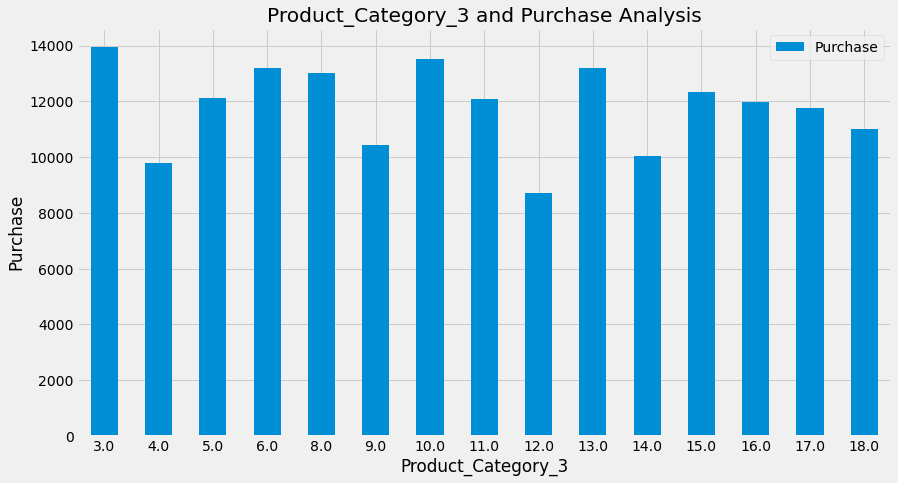

In [44]:
product_plot=df.pivot_table(index=['Product_Category_3'], values='Purchase', aggfunc=np.mean)
product_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Product_Category_3')
plt.ylabel("Purchase")
plt.title("Product_Category_3 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

## Missing Value Treatment

In [45]:
df[['Product_Category_2', 'Product_Category_3']].describe()

,Product_Category_2,Product_Category_3
count,376430.000000,166821.000000
mean,9.842329,12.668243
std,5.086590,4.125338
min,2.000000,3.000000
25%,5.000000,9.000000
50%,9.000000,14.000000
75%,15.000000,16.000000
max,18.000000,18.000000


<AxesSubplot:xlabel='Product_Category_2'>

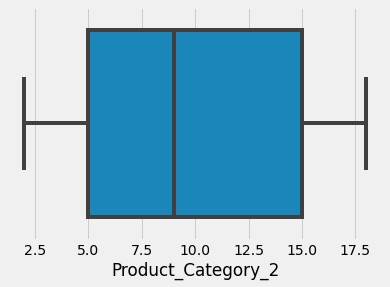

In [46]:
#Boxplot
sns.boxplot(df.Product_Category_2)

<AxesSubplot:xlabel='Product_Category_2', ylabel='Density'>

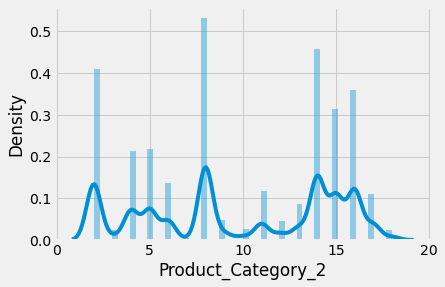

In [47]:
# Distribution plot
sns.distplot(df.Product_Category_2)

<b>we can see our data is bit right skewed, hence we will use Product_Category_2 median i.e '9' to replace its nan values 

In [48]:
df['Product_Category_2'].fillna(9,inplace = True)

<AxesSubplot:xlabel='Product_Category_3'>

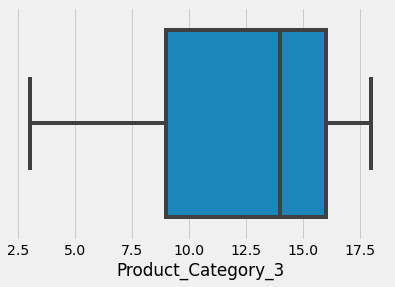

In [49]:
#Boxplot
sns.boxplot(df.Product_Category_3)

<AxesSubplot:xlabel='Product_Category_3', ylabel='Density'>

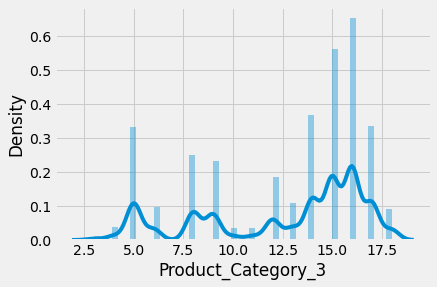

In [50]:
# Distribution plot
sns.distplot(df.Product_Category_3)

<b>we can see our data is left skewed, hence we will use Product_Category_3 median i.e '14' to replace its nan values 

In [51]:
df['Product_Category_3'].fillna(14,inplace = True)

In [52]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

# Baseline Model

In [53]:
df['prediction']=df['Purchase'].mean()

In [54]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(df['Purchase'], df['prediction']))
print('MSE:', metrics.mean_squared_error(df['Purchase'], df['prediction']))
print('RMSE:', metrics.mean_squared_error(df['Purchase'], df['prediction'],squared=False))

MAE: 4069.959165570567
MSE: 25231140.08138548
RMSE: 5023.060827959928


In [55]:
df.drop(columns=['prediction'],inplace=True)

# PREPROCESSING THE DATASET:

In [56]:
gender_dict = {'F':0, 'M':1}
df['Gender'] = df['Gender'].apply(lambda x: gender_dict[x])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2.0,0,3,9.0,14.0,8370
1,1000001,P00248942,0,0-17,10,A,2.0,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2.0,0,12,9.0,14.0,1422
3,1000001,P00085442,0,0-17,10,A,2.0,0,12,14.0,14.0,1057
4,1000002,P00285442,1,55,16,C,4.0,0,8,9.0,14.0,7969


In [57]:
cols = ['Age', 'City_Category', 'Stay_In_Current_City_Years']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,9.0,14.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,9.0,14.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,14.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,9.0,14.0,7969


# CORRELATION MATRIX:

<AxesSubplot:>

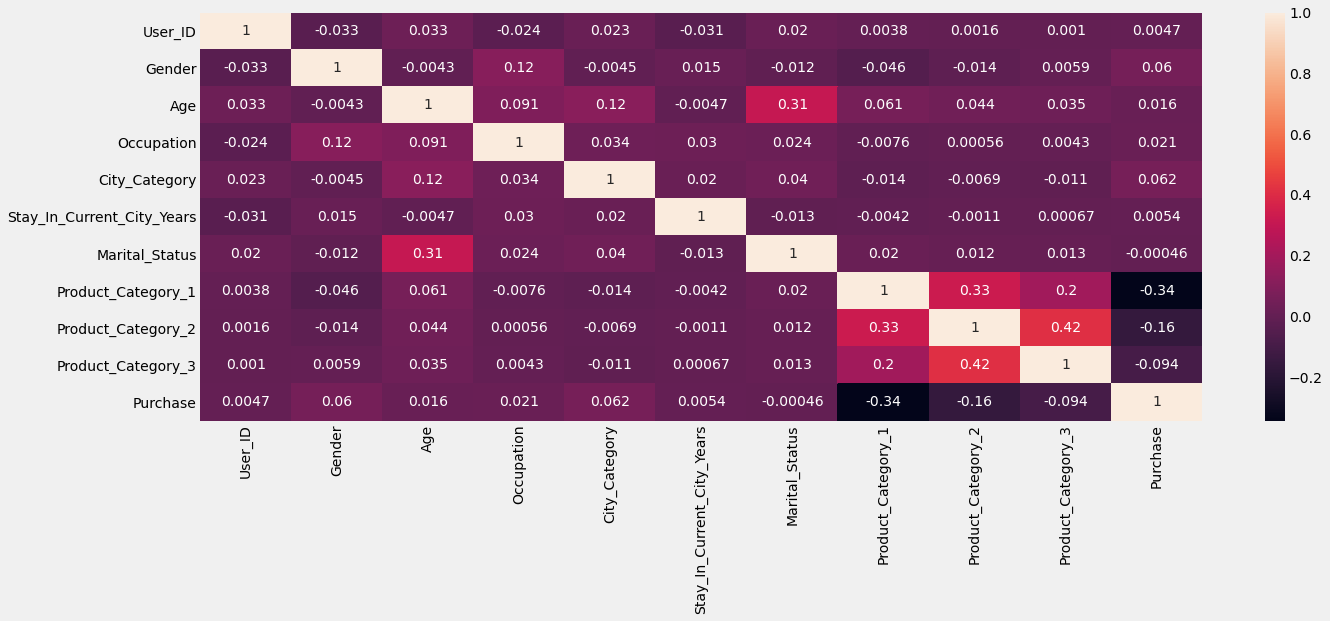

In [58]:
corr = df.corr()
plt.figure(figsize=(20,7))
sns.heatmap(corr, annot=True)

# INPUT SPLIT:

In [59]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,9.0,14.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,9.0,14.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,14.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,9.0,14.0,7969


In [60]:
X = df.drop(columns=['User_ID', 'Product_ID', 'Purchase'])
y = df['Purchase']

# MODEL TRAINING:

In [61]:
from sklearn.model_selection import cross_val_score, train_test_split

In [62]:
from sklearn.metrics import mean_squared_error

In [63]:
def train(model, X, y):
    
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)
    model.fit(x_train, y_train)
       
    pred = model.predict(x_test)
    
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Results")
    print("CV Score:", np.sqrt(cv_score))
    
    print('MAE:', metrics.mean_absolute_error(y_test, pred))
    print('MSE:', metrics.mean_squared_error(y_test, pred))
    print('RMSE:', metrics.mean_squared_error(y_test, pred,squared=False))
    
    

## Linear Regression

In [64]:
from sklearn import metrics

from sklearn.linear_model import LinearRegression

In [65]:
model = LinearRegression(normalize=True)

In [66]:
train(model, X, y)

Results
CV Score: 4696.996533517974
MAE: 3587.8082399588725
MSE: 21997251.42089196
RMSE: 4690.122751153956


<AxesSubplot:title={'center':'Model Coefficients'}>

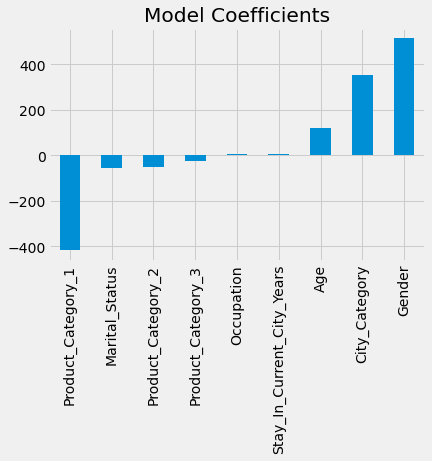

In [67]:
coef = pd.Series(model.coef_, X.columns).sort_values()

coef.plot(kind='bar', title='Model Coefficients')

### Linear regression after feature importance

In [68]:
train(model, X.drop(columns=['Occupation','Stay_In_Current_City_Years']), y)

Results
CV Score: 4697.1918607987045
MAE: 3587.660124745107
MSE: 21999179.53782854
RMSE: 4690.328297446623


## Decision Tree

Results
CV Score: 3320.8694172480155
MAE: 2361.5000632691203
MSE: 11205952.337209128
RMSE: 3347.529288476671


<AxesSubplot:title={'center':'Feature Importance'}>

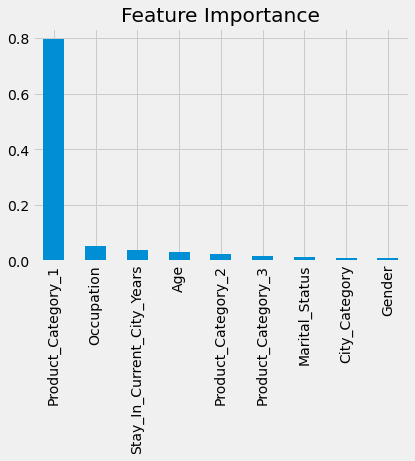

In [69]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

<b>As we can see Gender and City_Category do not impact the model such so we can create a new model without using them

## Random Forest

Results
CV Score: 3052.079587749397
MAE: 2225.25832547533
MSE: 9375715.127082884
RMSE: 3061.978956015682


<AxesSubplot:title={'center':'Feature Importance'}>

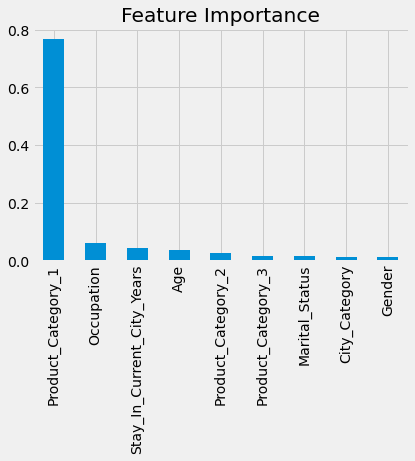

In [70]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)
train(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

## XgBoost 

Results
CV Score: 2885.691540495555
MAE: 2154.799087320887
MSE: 8340568.530808875
RMSE: 2888.0042470205744


<AxesSubplot:title={'center':'Feature Importance'}>

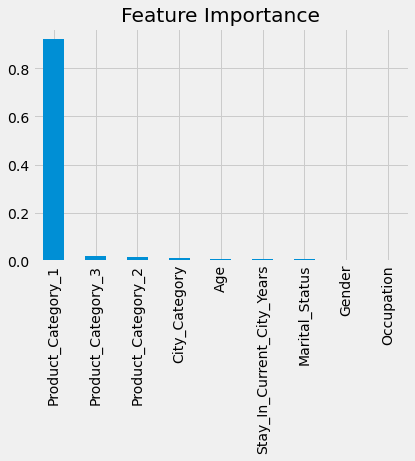

In [71]:
import xgboost as xgb
model = xgb.XGBRegressor()
train(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

# IMPORTING TEST DATA

In [73]:
test=pd.read_csv(r"E:\coaching\Data Science\Machine Learning\datasets\Black Friday\test.csv")


## Missing values Imputation

<b>we will treat the test data the same way we had treated train data

In [74]:
test['Product_Category_2'].fillna(9,inplace = True)
test['Product_Category_3'].fillna(14,inplace = True)

In [75]:
gender_dic = {'F':0, 'M':1}
test['Gender'] = test['Gender'].apply(lambda x: gender_dic[x])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,9.0,14.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,9.0,14.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,14.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,9.0,14.0,7969


In [76]:
cols = ['Age', 'City_Category', 'Stay_In_Current_City_Years']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    test[col] = le.fit_transform(test[col])

# Feature Engineering

In [77]:
# Copying the data in one more variable
df1 =  pd.DataFrame(df)

## Occupation

<AxesSubplot:xlabel='Occupation', ylabel='count'>

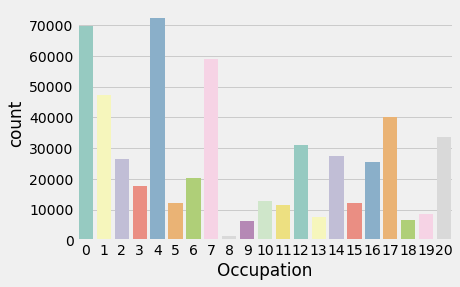

In [78]:
sns.countplot(df1['Occupation'],palette ='Set3')

In [79]:
values = pd.DataFrame(df1.Occupation.value_counts(sort=True, ascending=False))

In [80]:
values['Percent'] = df1.Occupation.value_counts(normalize = True)*100

In [81]:
values

,Occupation,Percent
4,72308,13.145284
0,69638,12.659889
7,59133,10.750125
1,47426,8.621843
17,40043,7.279645
20,33562,6.101427
12,31179,5.668208
14,27309,4.964659
2,26588,4.833584
16,25371,4.612339


Combining all the Occupation with count less than 2% i.e 19,13,18,9 and 8 together in one Occupation - 21

In [82]:
df1.Occupation= df1.Occupation.replace([19,13,18,9,8], 21)

In [83]:
df1.Occupation.value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
21    30648
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
Name: Occupation, dtype: int64

<AxesSubplot:xlabel='Occupation', ylabel='count'>

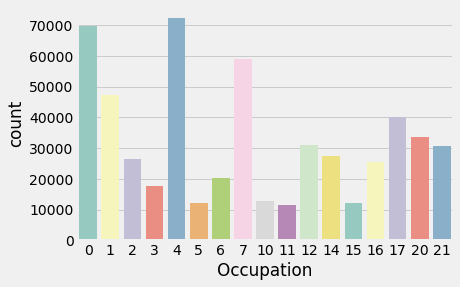

In [84]:
sns.countplot(df1['Occupation'],palette ='Set3')

# INPUT SPLIT:

In [85]:
df1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,9.0,14.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,9.0,14.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,14.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,9.0,14.0,7969


In [86]:
X = df1.drop(columns=['User_ID', 'Product_ID', 'Purchase'])
y = df1['Purchase']

## Linear Regression

In [87]:
model = LinearRegression(normalize=True)

In [88]:
train(model, X, y)

Results
CV Score: 4697.122923809417
MAE: 3587.7983538510853
MSE: 21998614.884298928
RMSE: 4690.26810366944


<AxesSubplot:title={'center':'Model Coefficients'}>

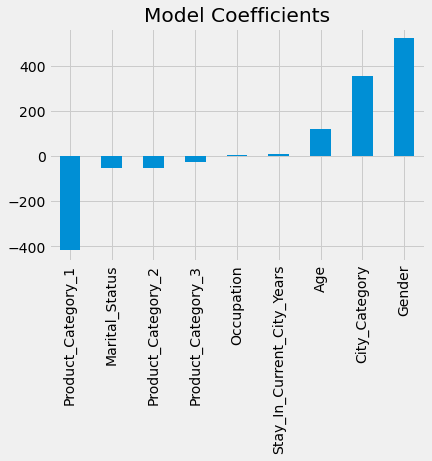

In [89]:
coef = pd.Series(model.coef_, X.columns).sort_values()

coef.plot(kind='bar', title='Model Coefficients')

## Linear regression after feature importance

In [90]:
train(model, X.drop(columns=['Occupation','Stay_In_Current_City_Years']), y)

Results
CV Score: 4697.1918607987045
MAE: 3587.660124745107
MSE: 21999179.53782854
RMSE: 4690.328297446623


## Decision Tree

Results
CV Score: 3321.053386060273
MAE: 2357.7931555294404
MSE: 11141555.341069197
RMSE: 3337.8968439826294


<AxesSubplot:title={'center':'Feature Importance'}>

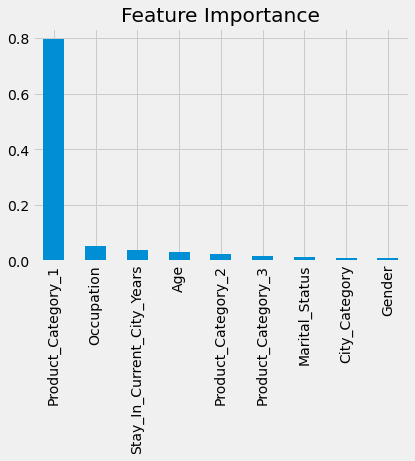

In [91]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

## Decsison Tree after feature importance

In [92]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X.drop(columns=['Gender','City_Category','Marital_Status']), y)

Results
CV Score: 3115.5829812315856
MAE: 2291.1578851988415
MSE: 9813724.240325576
RMSE: 3132.6864254702505


## Random Forest

Results
CV Score: 3052.715685846133
MAE: 2225.803210358765
MSE: 9372835.641156523
RMSE: 3061.508719758368


<AxesSubplot:title={'center':'Feature Importance'}>

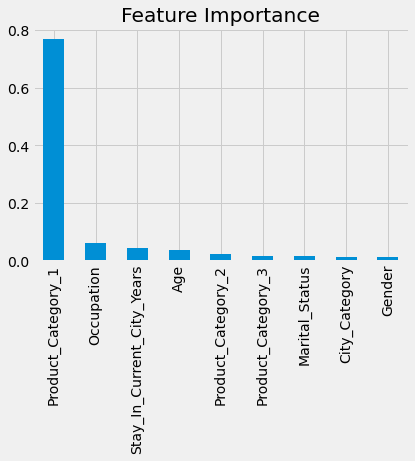

In [93]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)
train(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

## Random Forest after feature importance

In [94]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)
train(model, X.drop(columns=['Gender','City_Category','Marital_Status']), y)

Results
CV Score: 3036.330888943371
MAE: 2252.1578563990847
MSE: 9275787.486695806
RMSE: 3045.617751244533


## XgBoost

Results
CV Score: 2886.905428003037
MAE: 2160.5451742094733
MSE: 8377689.048250088
RMSE: 2894.423785185937


<AxesSubplot:title={'center':'Feature Importance'}>

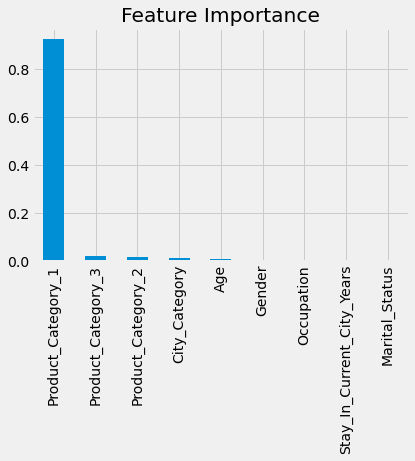

In [95]:
import xgboost as xgb
model = xgb.XGBRegressor()
train(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

# HYPER PARAMETER TUNING

Randomly selecting 20000 rows of the total number of rows

In [ ]:
hyper_df = pd.DataFrame(df.sample(n = 20000))

In [ ]:
hyper_df.head()

In [ ]:
X_hyper = hyper_df.drop(columns=['User_ID', 'Product_ID', 'Purchase'])
y_hyper = hyper_df['Purchase']

In [ ]:
X_hyper_train, X_hyper_test, y_hyper_train, y_hyper_test = train_test_split(X_hyper, y_hyper, random_state=42, test_size=0.25)

## Tuning on Random Forest

In [ ]:
tuned_paramaters = [{'n_estimators': [ 85, 100],
                     'min_samples_split': [15,20],
                     'max_depth': [8, 10],
                     'min_samples_leaf': [5,10],
                     'max_leaf_nodes': [10, 15]
                    }]

In [ ]:
from sklearn.model_selection import GridSearchCV

rf_reg_CV= RandomForestRegressor(random_state = 10)

grid = GridSearchCV(estimator = rf_reg_CV, 
                         param_grid = tuned_paramaters, 
                         cv = 10)

rfc_grid = grid.fit(X_hyper_train, y_hyper_train)

print('Best parameters for random forest regressor: ', rfc_grid.best_params_, '\n')

## Tuning on XgBoost

In [ ]:
 params = {'objective': ['reg:squarederror'],
    'booster': ['gbtree'],
        'verbosity':[0],
            'eta': range(0,1),
                'gamma': [0,1,2,3],
                    'max_depth':range(3,10),
                        'subsample': range(0,1),
                            'eval_metric': ['rmse']
                                
        
         }

In [ ]:
from sklearn.model_selection import GridSearchCV

xg_reg_CV= xgb.XGBRegressor(nthread=-1)


grid = GridSearchCV(estimator = xg_reg_CV, 
                         param_grid = params, 
                         cv = 10)


xg_grid = grid.fit(X_hyper_train, y_hyper_train)

print('Best parameters for xgboost regressor: ', xg_grid.best_params_, '\n')

# Model after Tuning 

## Random Forest 

In [93]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth = 8, max_leaf_nodes = 15, min_samples_leaf=5, min_samples_split =  15, n_estimators = 85)
train(model, X.drop(columns=['Gender','City_Category','Marital_Status']), y)

Results
CV Score: 3033.3130012013035
MAE: 2303.4256730433767
MSE: 9230836.597573146
RMSE: 3038.229187795606


## XgBoost 

In [94]:
import xgboost as xgb
model = xgb.XGBRegressor(booster = 'gbtree',
                         eta = 0.1,
                         eval_metric = 'rmse',
                         gamma = 3, 
                         max_depth = 10,
                         objective ='reg:squarederror',
                         subsample = 0.9,
                         verbosity = 0)
train(model, X, y)

Results
CV Score: 2865.0108180297084
MAE: 2134.6938281060616
MSE: 8226160.372839332
RMSE: 2868.1283745396286


# Final Predictions

In [95]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,1,4,7,1,2,1,1,11.0,14.0
1,1000009,P00113442,1,2,17,2,0,0,3,5.0,14.0
2,1000010,P00288442,0,3,1,1,4,1,5,14.0,14.0
3,1000010,P00145342,0,3,1,1,4,1,4,9.0,14.0
4,1000011,P00053842,0,2,1,2,1,0,4,5.0,12.0


In [96]:
test.Occupation= test.Occupation.replace([19,13,18,9,8], 21)

In [97]:
test['Purchase']=model.predict(test.drop(columns=['User_ID','Product_ID']))

# Data Submission

In [98]:
test[['Purchase','User_ID','Product_ID']].to_csv("submission_rf.csv",index=False)

In [99]:
test.drop(['Purchase'],axis = 1,inplace = True)